In [47]:
#import the required libraries
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)
from sklearn.model_selection import train_test_split

In [48]:
#filename = this will be the pathway for the swahili and hindi datasets.
#This function is basically for taking in the contents of the dataset.
def read_text(filename):
        # open the file
        file = open(filename, mode='rt', encoding='utf-8')
        
        # read all text
        text = file.read()
        file.close()
        return text

In [49]:
#This function is to split the text into swahili-english pairs and hindi-english pairs
def to_lines(text):
      sents = text.strip().split('\n')
      sents = [i.split('\t') for i in sents]
      return sents

In [90]:
#So now, we are taking in a filename which will basically be the hindi or swahili dataset and we are splitting them as mentioned above.
data = read_text("swahili.txt")
lang_eng = to_lines(data)
lang_eng


[['Any recent chills, night sweats or fever?',
  'Kuumwa , kutokwa majasho usiku au joto lolote hivi majuzi?',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
 ['Have you gained or lost weight without trying?',
  'Je, umeongeza au kupunguza uzani bila kukusudia?',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
 ['Have you been tired?',
  'Je, umewahi kuchoka?',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
 ['Any dry or itchy areas?',
  'Maeneo yoyote yaliyokauka au yanayowasha?',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #941078 (Fingerhut)'],
 ['Any rashes, bumps, or sores anywhere?',
  'Vipele, majipu au vidonda popote?',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #4008918 (JSakuragi) & #941078 (Fingerhut)'],
 ['Do you bruise easily?',
  'Je, wewe huchibuka kwa urahisi?',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #21

In [91]:
#Have the text be in array form
lang_eng = array(lang_eng)

In [92]:
lang_eng

array([['Any recent chills, night sweats or fever?',
        'Kuumwa , kutokwa majasho usiku au joto lolote hivi majuzi?',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Have you gained or lost weight without trying?',
        'Je, umeongeza au kupunguza uzani bila kukusudia?',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Have you been tired?', 'Je, umewahi kuchoka?',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ['Any dry or itchy areas?',
        'Maeneo yoyote yaliyokauka au yanayowasha?',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #941078 (Fingerhut)'],
       ['Any rashes, bumps, or sores anywhere?',
        'Vipele, majipu au vidonda popote?',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #4008918 (JSakuragi) & #941078 (Fingerhut)'],
       ['Do you bruise easily?', 'Je, wewe huchib

In [93]:
#Will use 50 lines from the dataset for the training part.
lang_eng = lang_eng[:50,:]

In [94]:
lang_eng

array([['Any recent chills, night sweats or fever?',
        'Kuumwa , kutokwa majasho usiku au joto lolote hivi majuzi?',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Have you gained or lost weight without trying?',
        'Je, umeongeza au kupunguza uzani bila kukusudia?',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Have you been tired?', 'Je, umewahi kuchoka?',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ['Any dry or itchy areas?',
        'Maeneo yoyote yaliyokauka au yanayowasha?',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #941078 (Fingerhut)'],
       ['Any rashes, bumps, or sores anywhere?',
        'Vipele, majipu au vidonda popote?',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #4008918 (JSakuragi) & #941078 (Fingerhut)'],
       ['Do you bruise easily?', 'Je, wewe huchib

In [95]:
#this gets rid of punctuations and has the text be lowercase
lang_eng[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in lang_eng[:,0]]
lang_eng[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in lang_eng[:,1]]
for i in range(len(lang_eng)):
    lang_eng[i,0] = lang_eng[i,0].lower()
    lang_eng[i,1] = lang_eng[i,1].lower()

In [96]:
lang_eng

array([['any recent chills night sweats or fever',
        'kuumwa  kutokwa majasho usiku au joto lolote hivi majuzi',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['have you gained or lost weight without trying',
        'je umeongeza au kupunguza uzani bila kukusudia',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['have you been tired', 'je umewahi kuchoka',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ['any dry or itchy areas',
        'maeneo yoyote yaliyokauka au yanayowasha',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #941078 (Fingerhut)'],
       ['any rashes bumps or sores anywhere',
        'vipele majipu au vidonda popote',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #4008918 (JSakuragi) & #941078 (Fingerhut)'],
       ['do you bruise easily', 'je wewe huchibuka kwa urahisi',
 

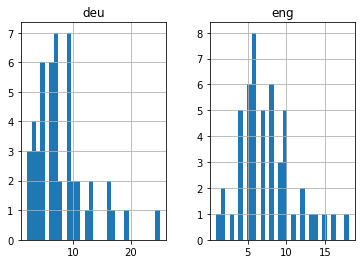

In [97]:
#Have two lists that store the length of sentences into two lists. 
#Purpose is to convert the input and output into integer sentences of length
eng_len = []
lang_len = []

for i in lang_eng[:,0]:
      eng_len.append(len(i.split()))

for i in lang_eng[:,1]:
      lang_len.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_len, 'deu':lang_len})

length_df.hist(bins = 30)
plt.show()



In [98]:
#The Tokenizer() class provided by Keras will turn sequences for both the input and output into integer sequences. 
#Tokens for both the language and english part.
def tokenization(lines):
      tokenizer = Tokenizer()
      tokenizer.fit_on_texts(lines)
      return tokenizer

In [99]:
#This is to tokenize the english pairs.
eng_tokenizer = tokenization(lang_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 10
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 168


In [100]:
#This is to tokenize the language part
lang_tokenizer = tokenization(lang_eng[:, 1])
lang_vocab_size = len(lang_tokenizer.word_index) + 1

lang_length = 10
print('Language Vocabulary Size: %d' % lang_vocab_size)

Language Vocabulary Size: 207


In [101]:
#This is the encoder sequence and padding is done to have the sentences be the same length.
def encode_sequences(tokenizer, length, lines):
         # integer encode sequences
         seq = tokenizer.texts_to_sequences(lines)
         # pad sequences with 0 values
         seq = pad_sequences(seq, maxlen=length, padding='post')
         return seq

In [102]:
# split data for training and testing
train, test = train_test_split(lang_eng, test_size=0.4, random_state = 12)

In [103]:
#Now we will use the function encoder_sequences. Input would be the sentences for language and the target would be english sentences.
#This has to be done for testing and training shown below.
trainX = encode_sequences(lang_tokenizer, lang_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])
testX = encode_sequences(lang_tokenizer, lang_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

In [104]:
# Now, the process to build Neural Machine Translator (NMT) model - encoder-decoder
#The encoder part has the first/embedding layer and LSTM model.
#The decoder part has LSTM model and dense layer which helps to return the output.
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(LSTM(units))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(units, return_sequences=True))
      model.add(Dense(out_vocab, activation='softmax'))
      return model

In [105]:
# Use the function from above to build the model
model = define_model(lang_vocab_size, eng_vocab_size, lang_length, eng_length, 80)

In [106]:
#RMSprop optimizer is used in the model with sparse categorical crossentropy as loss function.
#What will happen is that the target sequence will be as it is and we can use it like that. Otherwise, it will have a binary number for each integer value.
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [107]:
filename = 'model.h1.24_jan_19'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# trained model with 13 epochs, batch size of 80 with 20% of validation split.
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=13, batch_size=80, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

/Users/saumyapandey/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24 samples, validate on 6 samples
Epoch 1/13
24/24 [==============================] - 2s 100ms/step - loss: 5.1236 - val_loss: 5.1151

Epoch 00001: val_loss improved from inf to 5.11513, saving model to model.h1.24_jan_19
Epoch 2/13
24/24 [==============================] - 0s 2ms/step - loss: 5.1069 - val_loss: 5.1027

Epoch 00002: val_loss improved from 5.11513 to 5.10265, saving model to model.h1.24_jan_19
Epoch 3/13
24/24 [==============================] - 0s 2ms/step - loss: 5.0826 - val_loss: 5.0790

Epoch 00003: val_loss improved from 5.10265 to 5.07897, saving model to model.h1.24_jan_19
Epoch 4/13
24/24 [==============================] - 0s 2ms/step - loss: 5.0334 - val_loss: 5.0258

Epoch 00004: val_loss improved from 5.07897 to 5.02585, saving model to model.h1.24_jan_19
Epoch 5/13
24/24 [==============================] - 0s 2ms/step - loss: 4.9181 - val_loss: 4.8977

Epoch 00005: val_loss improved from 5.02585 to 4.89773, saving model to model.h1.24_jan_19
Epoch 6/1

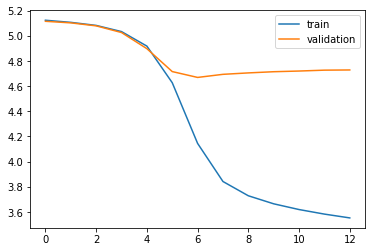

In [108]:
#shows that validation loss stopped decreasing after 6 epochs. 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [109]:
#predict the testing data 
model = load_model('model.h1.24_jan_19')
preds = model.predict_classes(testX.reshape((testX.shape[0],testX.shape[1])))

/Users/saumyapandey/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [110]:
#The predictions are in the form of integers. We need the words correlated to it.
def get_word(n, tokenizer):
      for word, index in tokenizer.word_index.items():
          if index == n:
              return word
      return None

In [111]:
#Convert the integers to English (target)
preds_text = []
for i in preds:
       temp = []
       for j in range(len(i)):
            t = get_word(i[j], eng_tokenizer)
            if j > 0:
                if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                     temp.append('')
                else:
                     temp.append(t)
            else:
                   if(t == None):
                          temp.append('')
                   else:
                          temp.append(t) 

       preds_text.append(' '.join(temp))

In [112]:
#Have a format where we have the actual translation and predicted translation
pred_df = pd.DataFrame({'actual' : test[:,0], 'predicted' : preds_text})

In [113]:
# print 15 rows randomly
pred_df.sample(15)

,actual,predicted
17,do you have headaches,
19,any belly acheabdominal pain,
2,have you had any dizziness room spinning or lightheadedness,
0,any pain when you take a deep breath,
1,when was your last mammogram,
10,do you wear a hearing aid,
11,have you ever had rheumatic fever,
4,do you ever awake at night short of breath,
15,any problems with your ears eg ringing pain discharge hearing problems,
5,any cough or phlegm production,
